# Face Analysis

Run the call for connect to keys and endpoint

In [1]:
cog_key = '364a31190adb46b0a4d1e7a908b057bc'
cog_endpoint = 'https://ml-faceanalysis.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://ml-faceanalysis.cognitiveservices.azure.com/ using key 364a31190adb46b0a4d1e7a908b057bc


**Find Similar faces**

It compare a faces and detecting faces to find faces with similar features.

the similar faces about:
- Photo 1: 2 person photo
- Photo 2: 4 person phoot

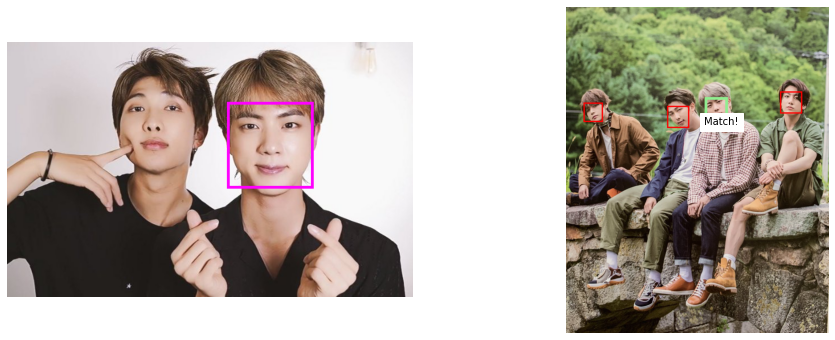

In [8]:
# Import library
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from python_code import faces
import os
%matplotlib inline

# Create face client
face_client = FaceClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Get the ID of the first face in image 1
image_1_path = os.path.join('data', 'face', 'bts2.jpg')
image_1_stream = open(image_1_path, "rb")
image_1_faces = face_client.face.detect_with_stream(image=image_1_stream)
face_1 = image_1_faces[0]

# Get the face IDs in a second image
image_2_path = os.path.join('data', 'face', 'bts1.jpg')
image_2_stream = open(image_2_path, "rb")
image_2_faces = face_client.face.detect_with_stream(image=image_2_stream)
image_2_face_ids = list(map(lambda face: face.face_id, image_2_faces))

# Find faces in image 2 that are similar to the one in image 1
similar_faces = face_client.face.find_similar(face_id=face_1.face_id, face_ids=image_2_face_ids)

# Show the face in image 1, and similar faces in image 2(code in python_code/face.py)
faces.show_similar_faces(image_1_path, face_1, image_2_path, image_2_faces, similar_faces)

# OCR

Run the call for connect to keys and endpoint

In [ ]:
cog_key = 'ee75bd9a505544fb9f7b5df857f8722b'
cog_endpoint = 'https://ml-ocr.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

**OCR API**

analyze an image and read any text it contains.

BIKINI BOTTOM
DRIVER LICENSE CLASS: s
EXPIRES: 12-14-03
oo
A1356021
SPONGEBOB SQUAREPANTS
124 CONCH ST.
BIKINI BOTTOM
HAIR:YELLOW EYES: BLUE
HT:O-04 wr:loz DOB: 07-14-86


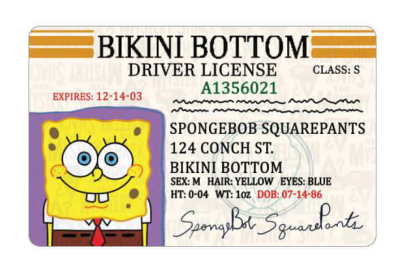

In [9]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
%matplotlib inline

# Get a client for the computer vision service
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Read the image file
image_path = os.path.join('data', 'ocr', 'spongebob.jpg')
image_stream = open(image_path, "rb")

# Use the Computer Vision service to find text in the image
read_results = computervision_client.recognize_printed_text_in_stream(image_stream)

# Process the text line by line
for region in read_results.regions:
    for line in region.lines:

        # Read the words in the line of text
        line_text = ''
        for word in line.words:
            line_text += word.text + ' '
        print(line_text.rstrip())

# Open image to display it.
fig = plt.figure(figsize=(7, 7))
img = Image.open(image_path)
draw = ImageDraw.Draw(img)
plt.axis('off')
plt.imshow(img)

Next, display it's bounding box, so we could see what have been missed.

BIKINI BOTTOM
DRIVER LICENSE CLASS: s
EXPIRES: 12-14-03
oo
A1356021
SPONGEBOB SQUAREPANTS
124 CONCH ST.
BIKINI BOTTOM
HAIR:YELLOW EYES: BLUE
HT:O-04 wr:loz DOB: 07-14-86


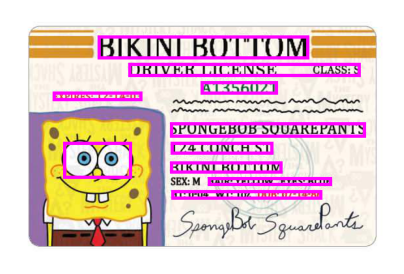

In [10]:
# Open image to display it.
fig = plt.figure(figsize=(7, 7))
img = Image.open(image_path)
draw = ImageDraw.Draw(img)

# Process the text line by line
for region in read_results.regions:
    for line in region.lines:

        # Show the position of the line of text
        l,t,w,h = list(map(int, line.bounding_box.split(',')))
        draw.rectangle(((l,t), (l+w, t+h)), outline='magenta', width=5)

        # Read the words in the line of text
        line_text = ''
        for word in line.words:
            line_text += word.text + ' '
        print(line_text.rstrip())

# Show the image with the text locations highlighted
plt.axis('off')
plt.imshow(img)

It shows that the SEX in Spongebob ID Card aint recognized yet, but the eyes of Spongebob were recognized.

**Read API**

It works well for images with small amount of text, like scanned documents and id card.

BIKINI BOTTOM
DRIVER LICENSE
CLASS: S
EXPIRES: 12-14-03
A1356021
SPONGEBOB SQUAREPANTS
124 CONCH ST.
BIKINI BOTTOM
SEX: M HAIR: YELLOW EYES: BLUE
HT: 0-04 WT: 10z DOB: 07-14-86
Spongebob SquarePants




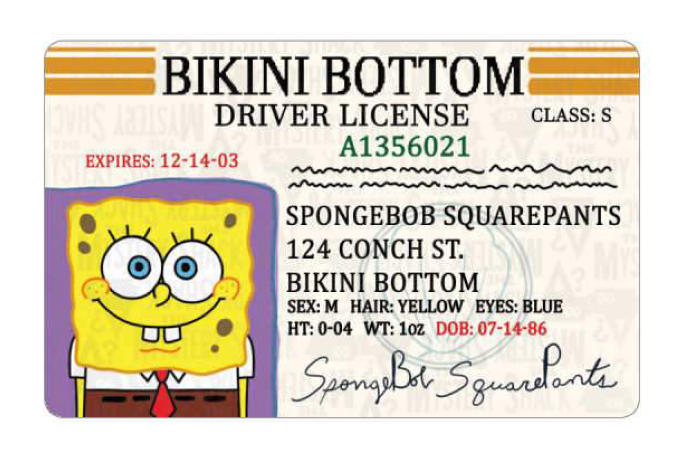

In [11]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials
import matplotlib.pyplot as plt
from PIL import Image
import time
import os
%matplotlib inline

# Read the image file
image_path = os.path.join('data', 'ocr', 'spongebob.jpg')
image_stream = open(image_path, "rb")

# Get a client for the computer vision service
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Submit a request to read printed text in the image and get the operation ID
read_operation = computervision_client.read_in_stream(image_stream,
                                                      raw=True)
operation_location = read_operation.headers["Operation-Location"]
operation_id = operation_location.split("/")[-1]

# Wait for the asynchronous operation to complete
while True:
    read_results = computervision_client.get_read_result(operation_id)
    if read_results.status not in [OperationStatusCodes.running]:
        break
    time.sleep(1)

# If the operation was successfuly, process the text line by line
if read_results.status == OperationStatusCodes.succeeded:
    for result in read_results.analyze_result.read_results:
        for line in result.lines:
            print(line.text)

# Open image and display it.
print('\n')
fig = plt.figure(figsize=(12,12))
img = Image.open(image_path)
plt.axis('off')
plt.imshow(img)

It shows the SEX are covered in Spongebob ID Card and the eyes aint envolved.